In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path='/content/drive/MyDrive/TITANIC/data'

In [5]:
os.chdir(path)
os.listdir()

['titanic.csv']

In [6]:
data= pd.read_csv('titanic.csv')

1.khám phá dữ liệu

In [7]:
#Hiển thị 5 dòng đầu tiên của dataFrame
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Hiển thị cột của dataFrame
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Hiển thị tổng số lượng dòng và cột trong dataFrame
data.shape

(891, 12)

In [ ]:
#Hiển thị thông tin về DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2.Phân tích dữ liệu

Text(0, 0.5, 'Tỉ lệ sống sót')

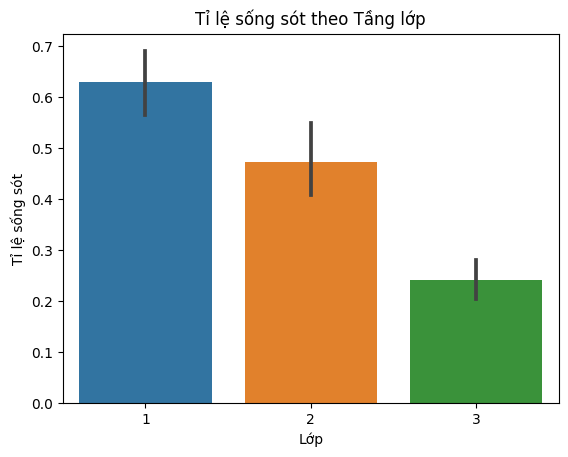

In [ ]:
#biểu đồ phân tích mối quan hệ giữa các biến và khả năng sống sót
sns.barplot(x='Pclass',y='Survived',data=data)
plt.title('Tỉ lệ sống sót theo Tầng lớp')
plt.xlabel('Lớp')
plt.ylabel('Tỉ lệ sống sót')

Text(0, 0.5, 'Tỉ lệ sống sót')

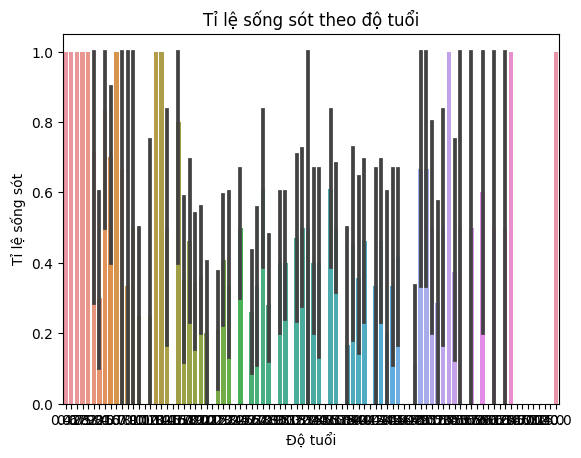

In [ ]:
sns.barplot(x = 'Age', y = 'Survived', data = data)
plt.title('Tỉ lệ sống sót theo độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Tỉ lệ sống sót')

Text(0, 0.5, 'Tỉ lệ sống sót')

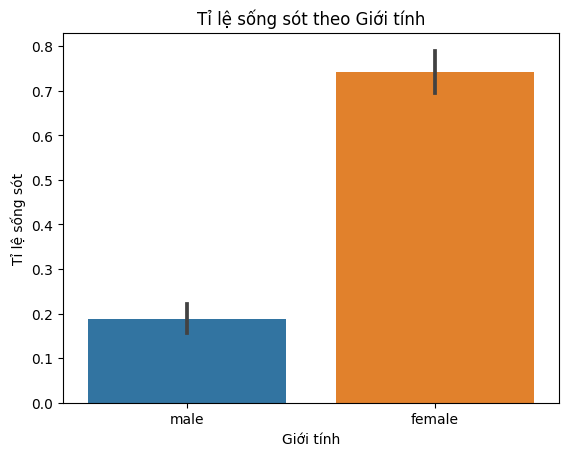

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data=data)
plt.title('Tỉ lệ sống sót theo Giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Tỉ lệ sống sót')

Text(0, 0.5, 'Tỉ lệ sống sót')

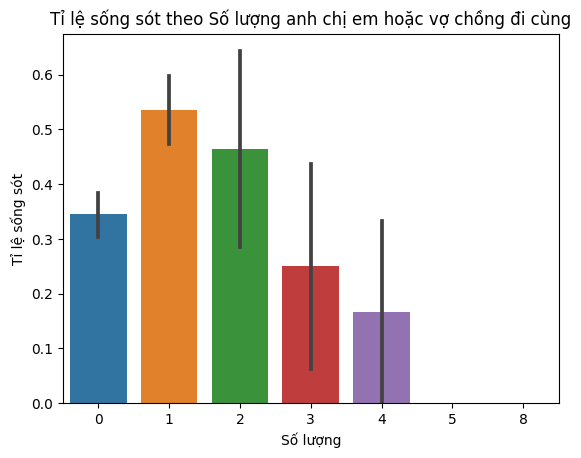

In [ ]:
sns.barplot(x = 'SibSp', y = 'Survived', data=data)
plt.title('Tỉ lệ sống sót theo Số lượng anh chị em hoặc vợ chồng đi cùng')
plt.xlabel('Số lượng')
plt.ylabel('Tỉ lệ sống sót')

Text(0, 0.5, 'Tỉ lệ sống sót')

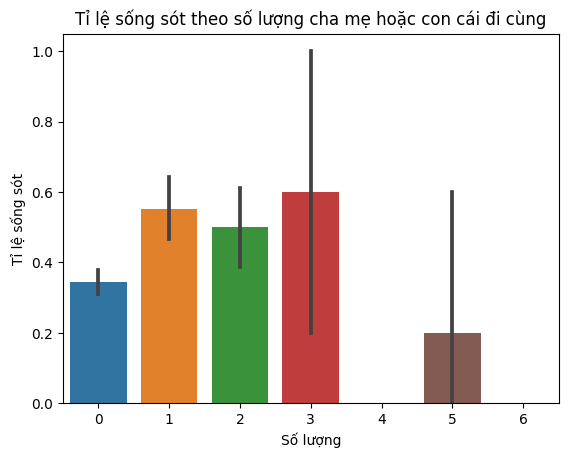

In [ ]:
sns.barplot(x='Parch', y = 'Survived',data=data)
plt.title('Tỉ lệ sống sót theo số lượng cha mẹ hoặc con cái đi cùng')
plt.xlabel('Số lượng')
plt.ylabel('Tỉ lệ sống sót')

Text(0, 0.5, 'Tỉ lệ sống sót')

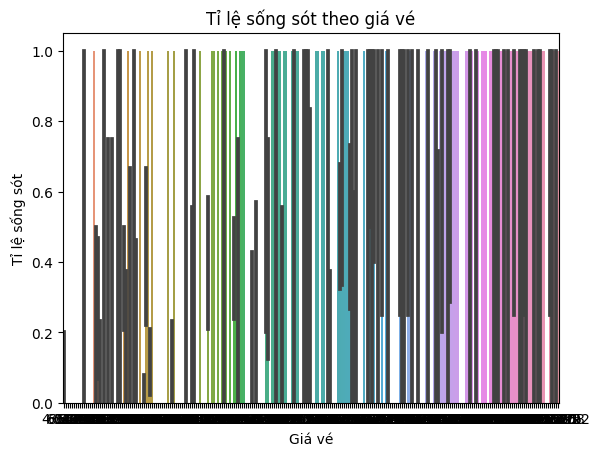

In [ ]:
sns.barplot(x = 'Fare', y = 'Survived', data=data)

plt.title('Tỉ lệ sống sót theo giá vé')
plt.xlabel('Giá vé')
plt.ylabel('Tỉ lệ sống sót')

3.Tiền xử lí dữ liệu

In [9]:
#Kiểm tra tổng dữ liệu trong cột còn thiếu
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Điền dữ liệu còn thiếu cho cột Age
mean = data['Age'].mean()
data['Age'].fillna(value = mean, inplace=True)

In [11]:
#Chuyển đổi dữ liệu trong cột Sex từ chuổi sang number
data['Sex'] = lb.fit_transform(data['Sex'])

In [12]:
#Thực hiện xóa các cột không cần thiết trong data
data = data.drop(['PassengerId', 'Name', 'Ticket','Cabin','Embarked'], axis=1)

4.Phân lớp dữ liệu

In [13]:
#Chia dữ liệu thành features (X) và Target variable (y)
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [14]:
#Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [16]:
#Xây dựng mô hình RandomForestClassifier
model_Random = RandomForestClassifier(n_estimators = 100,random_state = 42)
#Huấn luyện mô hình trên tập huấn luyện
model_Random.fit(X_train, y_train)
#Dự đoán trên tập kiểm tra
y_pred = model_Random.predict(X_test)
#Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy: .2f}')

Accuracy:  82.84


In [18]:
#Xây dựng mô hình SVC
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy:{accuracy: .2f}')

Accuracy: 65.67


In [19]:
#Xây dựng mô hình LogisticRegression
from sklearn.linear_model import LogisticRegression
model_Logistic = LogisticRegression(max_iter = 1000)
model_Logistic.fit(X_train, y_train)
y_pred = model_Logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy}')

Accuracy: 82.83582089552239


5.Đánh giá mô hình

***Biểu đồ sao sánh MSE**

MSE đo lường trung bình phương của sự chênh lệch giữa giá trị dự đoán và giá trị thực tế.

Càng nhỏ giá tri MSE, mô hình càng tốt. Giá trị 0 đạt được khi mô hình hoàn hảo, nhưng MSE có thể rơi vào khoảng từ 0 đến vô cùng lớn.

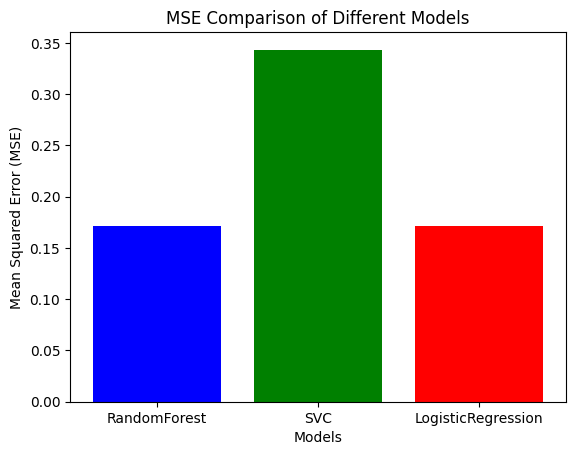

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Dự đoán trên tập kiểm tra cho RandomForestClassifier
y_pred_random = model_Random.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)

# Dự đoán trên tập kiểm tra cho SVC
y_pred_svc = model_SVC.predict(X_test)
mse_svc = mean_squared_error(y_test, y_pred_svc)

# Dự đoán trên tập kiểm tra cho LogisticRegression
y_pred_logistic = model_Logistic.predict(X_test)
mse_logistic = mean_squared_error(y_test, y_pred_logistic)

# Tạo biểu đồ MSE so sánh
models = ['RandomForest', 'SVC', 'LogisticRegression']
mse_values = [mse_random, mse_svc, mse_logistic]

plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of Different Models')
plt.show()


***Biểu đồ so sánh R-squared**

R-quared đo lường mức độ biểu diễn của mô hình, tức là phần trăm biến thiên của biến phụ thuộc mà mô hình giải thích được.

Giá trị R-quared càng gần 1, mô hình càng tốt. Nếu R-quared bằng 1, có nghĩa là mô hình giải thích toàn bộ biến thiên của dữ liệu.

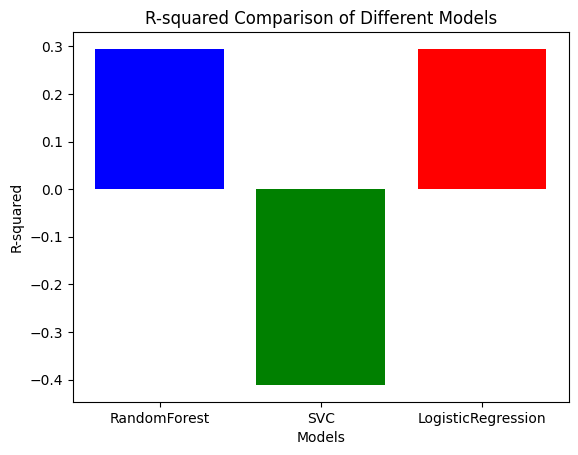

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dự đoán trên tập kiểm tra cho RandomForestClassifier
y_pred_random = model_Random.predict(X_test)
r2_random = r2_score(y_test, y_pred_random)

# Dự đoán trên tập kiểm tra cho SVC
y_pred_svc = model_SVC.predict(X_test)
r2_svc = r2_score(y_test, y_pred_svc)

# Dự đoán trên tập kiểm tra cho LogisticRegression
y_pred_logistic = model_Logistic.predict(X_test)
r2_logistic = r2_score(y_test, y_pred_logistic)

# Tạo biểu đồ R-squared so sánh
models = ['RandomForest', 'SVC', 'LogisticRegression']
r2_values = [r2_random, r2_svc, r2_logistic]

plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison of Different Models')
plt.show()


TEST

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
#chuẩn bị dữ liệu đầu vào cho dự án
passenger_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],
    'Age': [24],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [53.1]
})
#Dự đoán bằng mô hình RandomForestClassifier
prediction_Random = model_Random.predict(passenger_data)
if prediction_Random[0] == 1:
    print("Dự đoán của mô hình RandomForestClassifier thì Hành khách có khả năng sống sót.\n")
else:
    print("Dự đoán của mô hình RandomForestClassifier thì Hành khách không có khả năng sống sót.\n")

#Dự đoán bằng mô hình SVC
prediction_Random = model_SVC.predict(passenger_data)
if prediction_Random[0] == 1:
    print("Dự đoán của mô hình SVC thì Hành khách có khả năng sống sót.\n")
else:
    print("Dự đoán của mô hình SVC thì Hành khách không có khả năng sống sót.\n")

#Dự đoán bằng mô hình LogisticRegression
prediction_Random = model_Logistic.predict(passenger_data)
if prediction_Random[0] == 1:
    print("Dự đoán của mô hình LogisticRegression thì Hành khách có khả năng sống sót.\n")
else:
    print("Dự đoán của mô hình LogisticRegression thì Hành khách không có khả năng sống sót.\n")

Dự đoán của mô hình RandomForestClassifier thì Hành khách có khả năng sống sót.

Dự đoán của mô hình SVC thì Hành khách không có khả năng sống sót.

Dự đoán của mô hình LogisticRegression thì Hành khách có khả năng sống sót.

